In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load parkinson dataset and separate target variable
data = pd.read_csv("pd_speech_features.csv")
print(data.head())

  Unnamed: 0 Unnamed: 1 Baseline Features Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0         id     gender               PPE        DFA       RPDE  numPulses   
1          0          1           0.85247    0.71826    0.57227        240   
2          0          1           0.76686    0.69481    0.53966        234   
3          0          1           0.85083    0.67604    0.58982        232   
4          1          0           0.41121    0.79672    0.59257        178   

         Unnamed: 6        Unnamed: 7          Unnamed: 8    Unnamed: 9  ...  \
0  numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...   
1               239        0.00806353            8.68E-05       0.00218  ...   
2               233       0.008258256            7.31E-05       0.00195  ...   
3               231        0.00833959            6.04E-05       0.00176  ...   
4               177       0.010857733         0.000182739       0.00419  ...   

                Unnamed: 745               Unnamed

In [ ]:
x= data.iloc[1:757,0:753]
y = data.iloc[1:757 , 754]

In [ ]:
#split dataset into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size = 0.25,random_state =0)

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
#creating the classifier object
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state=0)

#perform training
classifier = classifier.fit(x_train , y_train)

In [ ]:
#prediction on test data
y_pred = classifier.predict(x_test)
print(y_pred)

['1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '0' '0' '1' '1' '1' '1' '0'
 '1' '0' '1' '0' '0' '1' '1' '1' '0' '1' '1' '1' '1' '1' '0' '1' '1' '0'
 '1' '1' '1' '1' '0' '1' '0' '1' '1' '0' '0' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '0' '0' '1' '1'
 '1' '1' '1' '1' '1' '0' '0' '1' '1' '1' '0' '1' '0' '1' '1' '1' '1' '1'
 '0' '1' '1' '0' '1' '1' '1' '1' '0' '0' '0' '1' '1' '1' '1' '0' '1' '1'
 '0' '1' '1' '1' '1' '0' '1' '1' '1' '1' '0' '1' '1' '1' '0' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '0' '1' '1'
 '1' '0' '1' '1' '1' '0' '1' '1' '1']


In [ ]:
#to calculate accuracy
from sklearn import metrics
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7513227513227513


In [ ]:
#construct confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 19  26]
 [ 21 123]]


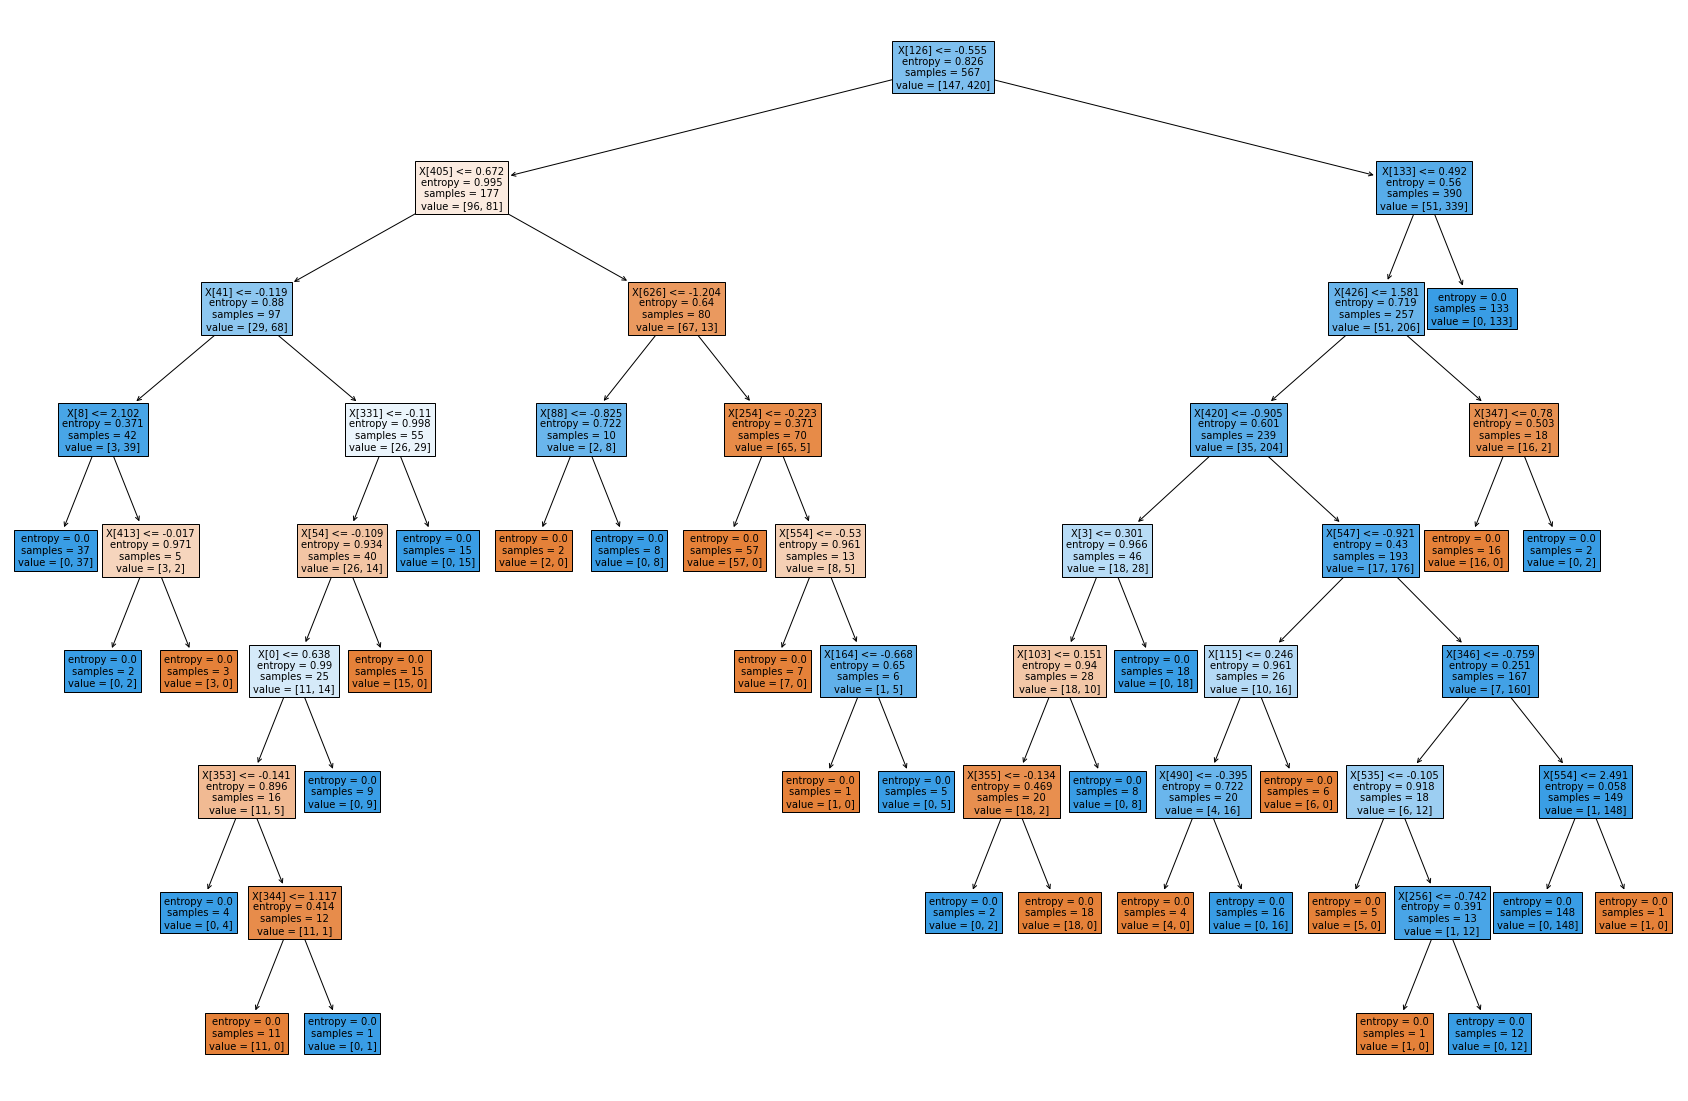

In [ ]:
#plot decision tree with plot_tree
from sklearn import tree
fig = plt.subplots(figsize = (30,20))
tree.plot_tree(classifier,fontsize =10,filled = True)
plt.show()